In [1]:
import os
os.environ['KAGGLE_USERNAME'] = 'chiragkhanna21'
os.environ['KAGGLE_KEY'] = 'c250555c7bad7beeef9b27ecbac40a54'
!kaggle datasets download -d hijest/genre-classification-dataset-imdb

Dataset URL: https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb
License(s): other
 91% 38.0M/41.7M [00:00<00:00, 105MB/s] 
100% 41.7M/41.7M [00:00<00:00, 97.3MB/s]


In [2]:
!unzip genre-classification-dataset-imdb.zip

Archive:  genre-classification-dataset-imdb.zip
  inflating: Genre Classification Dataset/description.txt  
  inflating: Genre Classification Dataset/test_data.txt  
  inflating: Genre Classification Dataset/test_data_solution.txt  
  inflating: Genre Classification Dataset/train_data.txt  


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train_data_path="/content/Genre Classification Dataset/train_data.txt"
X =pd.read_csv(train_data_path,sep=":::",names=["Movie_name","Gener","Description"],engine="python")

In [4]:
X.head(10)

,Movie_name,Gener,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...
8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...
9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss..."
10,Spirits (2014/I),horror,Four high school students embark on a terrify...


In [5]:
X.describe()

,Movie_name,Gener,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [6]:
X.isnull().sum()

,0
Movie_name,0
Gener,0
Description,0


In [7]:
test_data_path="/content/Genre Classification Dataset/test_data.txt"
y=pd.read_csv(train_data_path,sep=":::",names=["Movie_name","Gener","Description"],engine="python")

In [8]:
y.head(10)

,Movie_name,Gener,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...
8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...
9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss..."
10,Spirits (2014/I),horror,Four high school students embark on a terrify...


In [9]:
y.describe()

,Movie_name,Gener,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


<ipython-input-10-3247de9fa9d1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


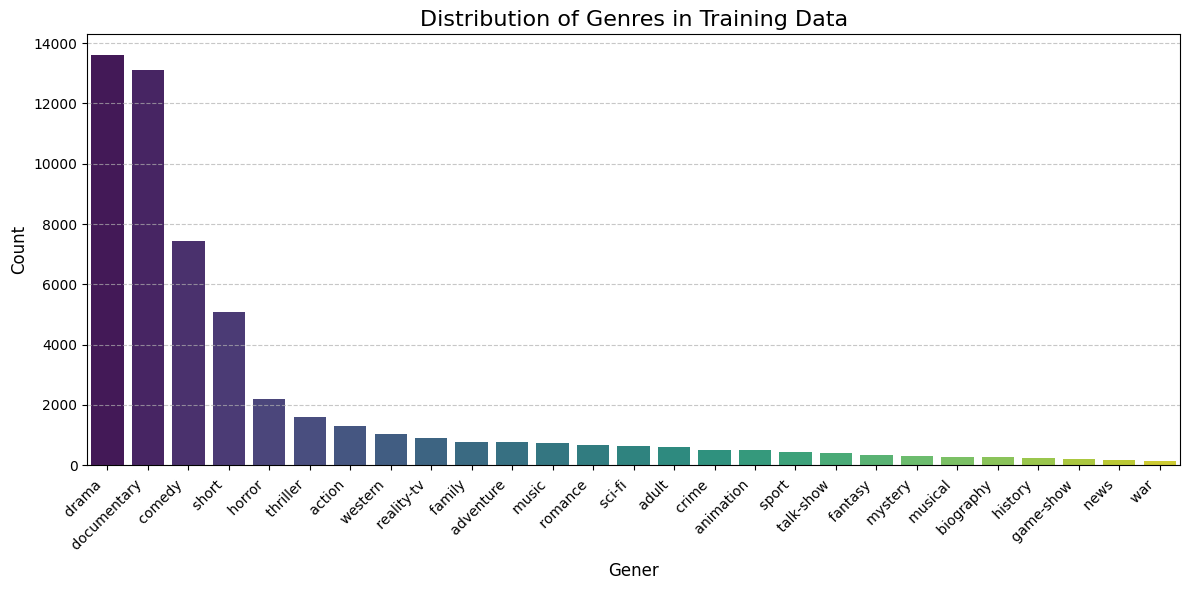

In [10]:
genre_counts = X['Gener'].value_counts()
genre_counts = genre_counts.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Distribution of Genres in Training Data', fontsize=16)
plt.xlabel('Gener', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Ensure X and y have the same number of samples before splitting
assert X.shape[0] == y.shape[0], "Number of samples in X and y don't match!"

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X['Description'], y['Gener'],
                                                    test_size=0.3, random_state=42)

# 1. Vectorize text data (e.g., movie descriptions)
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train) # Fit and transform on X_train['Description']
X_test = vectorizer.transform(X_test) # Transform X_test['Description']

# 2. Encode target labels (genres)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Encode y_train['Gener']
y_test_encoded = label_encoder.transform(y_test) # Encode y_test['Gener']

# 3. Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train_encoded) # Use encoded labels for training

DecisionTreeClassifier(random_state=42)

In [16]:
y_train = label_encoder.fit_transform(X['Gener'])

In [23]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test_encoded, y_pred_dt)) # Use y_test_encoded
print("Decision Tree Classification Report:\n", classification_report(y_test_encoded, y_pred_dt)) # Use y_test_encoded


Decision Tree Accuracy: 0.3454042422379342
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.08      0.09       398
           1       0.09      0.10      0.09       156
           2       0.10      0.10      0.10       220
           3       0.03      0.03      0.03       146
           4       0.04      0.02      0.03        88
           5       0.28      0.30      0.29      2215
           6       0.04      0.03      0.03       164
           7       0.55      0.58      0.57      3942
           8       0.42      0.46      0.44      4076
           9       0.06      0.05      0.05       218
          10       0.01      0.01      0.01       103
          11       0.33      0.24      0.28        55
          12       0.03      0.03      0.03        73
          13       0.18      0.17      0.17       626
          14       0.20      0.16      0.18       217
          15       0.05      0.05      0.05        77


In [27]:
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming 'X' is your DataFrame with features and 'y' is your DataFrame with labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Vectorize text data
vectorizer = CountVectorizer(analyzer="word", tokenizer=None, preprocessor=None, stop_words=None, max_features=3000)
train_data_features = vectorizer.fit_transform(X_train['Description'])  # Use X_train here
train_data_features = train_data_features.toarray()

# Encode target labels (do this AFTER splitting)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train['Gener'])  # Use y_train here

# Initialize and train the model
lin_clf = svm.LinearSVC()
lin_clf.fit(train_data_features, y_train_encoded)  # Now the shapes should match

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [30]:
# If 'predict' is a function you've defined in your notebook, use it directly
# Example:
def predict(vectorizer, model, data):
    # Your prediction logic here
    # Example:
    data_features = vectorizer.transform(data['Description'])
    predictions = model.predict(data_features)
    return predictions  # Or print them, or do something else

predict(vectorizer, lin_clf, X_test)  # Use X_test for predictions, not the whole dataset 'X'

array([ 5, 19, 20, ...,  7,  8,  7])

In [33]:
# Assuming 'vectorizer' is your CountVectorizer object
X_test_features = vectorizer.transform(X_test['Description'])
X_test_features = X_test_features.toarray()  # If your model requires array format

y_pred = lin_clf.predict(X_test_features)
predicted_genres = label_encoder.inverse_transform(y_pred)

print(predicted_genres)

[' comedy ' ' romance ' ' sci-fi ' ... ' documentary ' ' drama '
 ' documentary ']
